<a href="https://colab.research.google.com/github/KontainPluton/TPs_Artificial_Neural_Network/blob/main/%5BTP2%5D_%5BCorrection%5D_Convolutional_Neural_Networks_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks (CNNs)

This practical session is dedicated to a special kind of multi-layer neural networks called convolutional neural networks (CNNs). CNNs have been proposed by [Yann LeCun](http://yann.lecun.com/exdb/publis/pdf/lecun-89.pdf) and is now widely used in image and video processing. 
 
In the last session, you experimented a Multi-Layer Perceptron (MLP) architecture for handwritten digit recongnition on MNIST dataset. You have noticed that the performance was quite good (accuracy of 93% using a single epoch). So, you may wonder why do we need to introduce a new type of neural netwoks to process images?

To understand this, let us take an example with an image of bigger size than the one we used on MNIST dataset (remember images on MNIST dataset are 28x28 pixels). Let's say we have a 100 x 100 pixels image. If we use our MLP, we will need 10000 inputs in order to process the image (remember we would use flatten to transorm the 100 x 100 pixels into a vector like format of size 10000). 

Remember, the first hidden layer we use had 1000 neurones. In that context, it means that dealing with our 100 x 100 images, the first weight matrix of our MLP would be of size 10000 x 1000... So for the first hidden layer only, we would have 10 million parameters! This is a huge number considering we are only on the first hidden layer! It would be difficult for the optimizer to find good values for the parameters, thus training time becomes longer and may not result on a good validation accuracy. As we will see, CNNs solve this problem by using **partially connected layers** and **weight sharing**. 



## [Type of convolutional layers](https://datascience.stackexchange.com/a/51474)
You can encounter 3 types of convolutional layers (all implemented in Pytorch).

**1D convolution ([conv1d](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html#torch.nn.Conv1d)) :**  is generally used to process one dimensional data like voice or even sentences. 

**2D convolution ([Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)) :**  the most common type of convolution encountered in practice. It is widely used to process input images. 


**3D convolution ([Conv3d](https://pytorch.org/docs/stable/generated/torch.nn.Conv3d.html#torch.nn.Conv3d)) :** its common use case is with video data since we need to process a frame of images at a time.  


## CNN layer main components
To explain how convolutional layer works, let us take an example of 2D convolution (the principle is the same for the 1D and 3D convolutions) and look at its corresponding pytorch function : 
```python

torch.nn.Conv2d(in_channels: int, out_channels: int, kernel_size: Union[T, Tuple[T, T]], stride: Union[T, Tuple[T, T]] = 1, padding: Union[T, Tuple[T, T]] = 0, dilation: Union[T, Tuple[T, T]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros')

```


### Input channels : 
In the original input, `in_channels` correspond to the number of data streams for a that input. For an RGB image, there are 3 input channels, one for each color channel. For a grey-scale image, there is only one channel. The number of input channels in intermediate convolutional layers corresponds to the number of output channels of the previous layer.



### Output channels : 
It corresponds to the number of feature maps that will be generated by the convolution layer (more detail on the next point). Feature maps are detailled below.



### Convolution kernels :
Also known as filters, they are a set fixed shape window of parameters. Those filters will be used to extract features from the given input. The size of a kernel is always smaller than the size of the input. It  corresponds to a tensor of parameters (+ eventually extra bias). Most used kernel size are (3,3), (5,5) and (7,7), (9,9) for bigger input images. 

Those kernels are used to perform convolutions. The convolution operation corresponds to a dot-product between the kernel and the input. Each time, a part of the input with the same size as the kernel is used for the dot-product, which results on a partially connected layer, since it takes only a part of the input at a time. The resulting output of applying convolution kernels on an input is called feature maps. The number of feature maps corresponds to the number of the defined `out_channels`. 

The number of kernels depends on the number of input channels and output channels. For each output channel, we must provide `in_channels` kernels, one for each channel of the input, thus, the total number of kernels is equal to `in_channels` x  `out_channels`. 

Note that in its implementation, the convolution layer also includes a bias.



### Stride
Since the convolution kernel is of a smaller size than the input, it needs to move along the input to completely process it. The amount by which ther kernel moves is controlled by the stride parameter. Note that the same kernel moves to process the input, which stresses the weight sharing property of the convolutional neural networks.

Here's an [animated](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) convolutional operation with a one-channel input (in blue) of size 4 x 4 and a (3,3) kernel that moves by a stride of 1. It results on a single output feature map of size 2x2 (in green) 


![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides.gif)



### Padding 
The padding corresponds to the amount of pixel added to an image when processed by the kernel. The pixel values added as padding is generally 0. There are few advantages on adding a padding to an image :
- Prevents from loosing pixels from the border of the image : each time a convolution layer is applied, our input image shrinks. This may result on a loss of information. Adding a padding helps us keeping the border pixel values while processing the image.

- Shrinking the input by applying multiple convolution layers limits the number of time we can use these layers to process our input images ; adding a padding helps to augment the number of layers we can use.

The image below shows a 10x10 image with a padding of 1 added to each side. Note that, by doing this, our image is now of size 12x12. As an example, considering such a padding using a kernels of size 4 x 4 would lead to a better characterization of the image (more features per map).



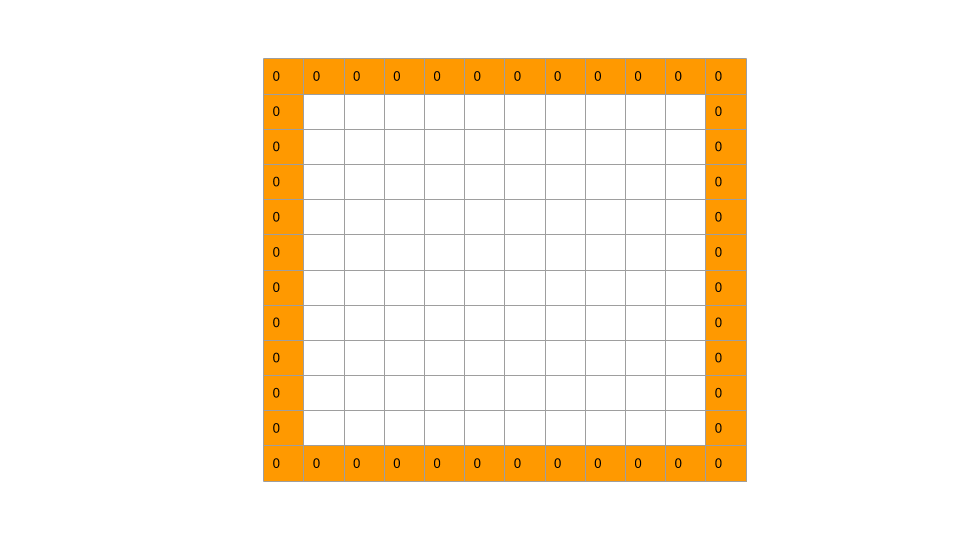

### Example 
To help understand more how it works, let's take a toy example of one input that have 3 channels. The size of the input is 4x4. Then, let's create an conv2d layer with no bias and examine the convolution operation.

In [ ]:
import torch

input = torch.rand(1,3,4,4) # create an input of shape [1,3,4,4]: Batch size, nb channels, height, width
print("Input shape : {}\n".format(input.shape))

# note that the default required arguments to define a convolution layer are in_channels, out_channels and kernel_size
conv_layer = torch.nn.Conv2d(in_channels=3, out_channels=1,kernel_size=(3,3),stride=1,padding=0, bias=False)


# let's examine the shape of the weight matrix of the convolution layer
print("Convolution layer weight matrix shape {}".format(conv_layer.weight.shape))

Input shape : torch.Size([1, 3, 4, 4])

Convolution layer weight matrix shape torch.Size([1, 3, 3, 3])


Here's how to interprete the size of the weight matrix: 
- 1 corresponds to the number of out channels; 
- 3 in the second dimension refers to the number input channels
- the last dimensions correspond to the kernel size (here 3, 3)

**Question**: considering the size of the input and the parameters of the convolution, how many feature map values do you expect? 

Let us now compute the result of applying the convolution layer on our input and print out the result.


In [ ]:
conv_output = conv_layer(input)
print("The result of the convolution :\n {}\n".format(conv_output))
print("Shape of the result of the convolution: {}\n".format(conv_output.shape))

The result of the convolution :
 tensor([[[[0.1714, 0.0005],
          [0.0463, 0.0831]]]], grad_fn=<ConvolutionBackward0>)

Shape of the result of the convolution: torch.Size([1, 1, 2, 2])



As you can see, the result of the convolution is a 2x2 feature map with 1 channel (refer to the illustration above, it's the same thing).

See the parameters of your 3 kernels (each one is specific to one input channel):



In [ ]:
print(conv_layer.weight)

Parameter containing:
tensor([[[[ 0.0398,  0.1334, -0.0231],
          [-0.0915,  0.0613,  0.1510],
          [ 0.1534, -0.1027,  0.1846]],

         [[-0.1806, -0.0314, -0.1897],
          [ 0.0475,  0.0164,  0.1282],
          [-0.0272, -0.0714,  0.1604]],

         [[ 0.0674, -0.1421, -0.0923],
          [ 0.1906, -0.1872, -0.0319],
          [-0.0911, -0.1095,  0.0668]]]], requires_grad=True)



To understand more the convolution operation, let's try to *manually* reproduce the result and compare it to the values obtained by the convolution layer. 


In [ ]:
#let's first get the convlution layer weight matrix. 
weight = conv_layer.weight # shape : [out_channel, in_channel, kernel_size[0], kernel_size[1]]

# weight[0,0] is the convolution kernel on in_channel 1
# weight[0,1] is the convolution kernel on in_channel 2
# weight[0,2] is the convolution kernel on in_channel 3

# fmv = feature map value

kernel_c1 = weight[0,0]

fmv_c1 = torch.Tensor(
    [
     [( kernel_c1 * input[0,0,0:3,0:3]).sum(), (kernel_c1 * input[0,0,0:3,1:4]).sum()], 
     [( kernel_c1 * input[0,0,1:4,0:3]).sum(), (kernel_c1 * input[0,0,1:4,1:4]).sum()]
    ]
)

kernel_c2 = weight[0,1]

fmv_c2 = torch.Tensor(
    [
     [(kernel_c2  * input[0,1,0:3,0:3]).sum(), (kernel_c2  * input[0,1,0:3,1:4]).sum()], 
     [(kernel_c2  * input[0,1,1:4,0:3]).sum(), (kernel_c2  * input[0,1,1:4,1:4]).sum()]
    ]
)

kernel_c3 = weight[0,2]

fmv_c3 = torch.Tensor(
    [
     [(kernel_c3 * input[0,2,0:3,0:3]).sum(), (kernel_c3 * input[0,2,0:3,1:4]).sum()], 
     [(kernel_c3 * input[0,2,1:4,0:3]).sum(), (kernel_c3 * input[0,2,1:4,1:4]).sum()]
    ]
)

output = fmv_c1 + fmv_c2 + fmv_c3

print(output)

# Which can also be expressed by
# --- 

fmv0 = (weight[0,0] * input[0,0,0:3,0:3] + weight[0,1] * input[0,1,0:3,0:3] + weight[0,2] * input[0,2,0:3,0:3]).sum()
fmv1 = (weight[0,0] * input[0,0,0:3,1:4] + weight[0,1] * input[0,1,0:3,1:4] + weight[0,2] * input[0,2,0:3,1:4]).sum()
fmv2 = (weight[0,0] * input[0,0,1:4,0:3] + weight[0,1] * input[0,1,1:4,0:3] + weight[0,2] * input[0,2,1:4,0:3]).sum()
fmv3 = (weight[0,0] * input[0,0,1:4,1:4] + weight[0,1] * input[0,1,1:4,1:4] + weight[0,2] * input[0,2,1:4,1:4]).sum()


print("fmv0 = {:.4f}, conv_output_0 = {:.4f}".format(fmv0.item() , conv_output[0,0,0,0].item()))
print("fmv1 = {:.4f}, conv_output_1 = {:.4f}".format(fmv1.item() , conv_output[0,0,0,1].item()))
print("fmv2 = {:.4f}, conv_output_2 = {:.4f}".format(fmv2.item() , conv_output[0,0,1,0].item()))
print("fmv3 = {:.4f}, conv_output_3 = {:.4f}".format(fmv3.item() , conv_output[0,0,1,1].item()))

tensor([[0.1714, 0.0005],
        [0.0463, 0.0831]])
fmv0 = 0.1714, conv_output_0 = 0.1714
fmv1 = 0.0005, conv_output_1 = 0.0005
fmv2 = 0.0463, conv_output_2 = 0.0463
fmv3 = 0.0831, conv_output_3 = 0.0831


### Pooling
The goal of the pooling layer is to shrink the feature maps in order to reduce the memory usage, the computational load and the number of parameters of the next layers. Just like the convolution layer, this layer is also a sliding window so it is necessary to define a kernel size, the stride and a padding but does not require to know the number of input and output channels, since they will perform the same operations regardless the number of feature maps. 
The difference between the convolution layer and the pooling layer is that, this latter, do not have learnable parameters. 

There are two types of pooling layers :
- **Average pooling** : it computes and average value of a `kernel_size` window for each feature map.

- **Max pooling** : it computes the maximum value of a `kernel_size` window for each feature map.

The image below shows an example of how the two pooling layers work.
The matrix to the left represents the output of the conv layer, i.e. feature map values. The matrix to the right is the output of the pooling layer.



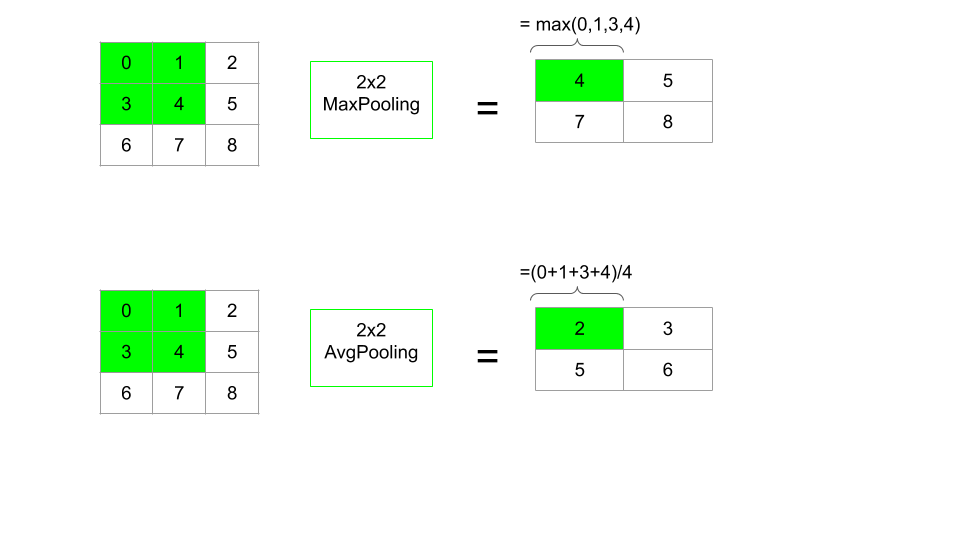

Pytorch defines pooling layers for 1d, 2d and 3d inputs just as we saw for the convolution layer.
Here are the links to the 2d versions of both max and average pooling layers

https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html#torch.nn.AvgPool2d

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

## Exercice : LeNet-5

You will now implement [LeNet-5](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf), one of the first convolutional neural networks that later inspired the design of modern deep convolution architectures like [AlexNet](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf).
This architecture uses a 2D convolution layer as a building bloc to process images. We will use it on the MNIST dataset (recall that MNIST dataset has images with 1 channel, width of 28 and height of 28).

The image below represents the architecture of LeNet-5. The detail of each layer is given in the table that follows. Note that, in the original model, the activation function used is ```tanh```. To speed up training, we replaced it by the ```ReLU``` activation.

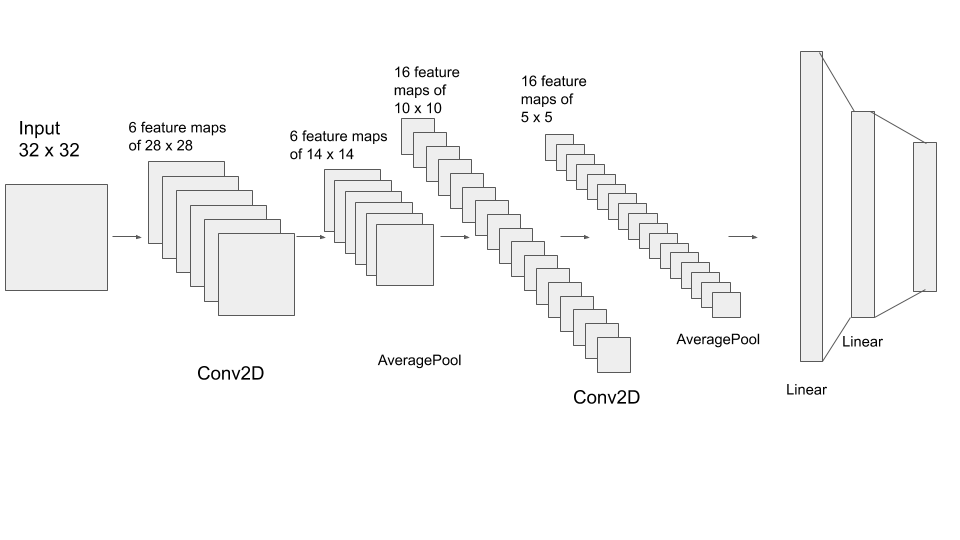

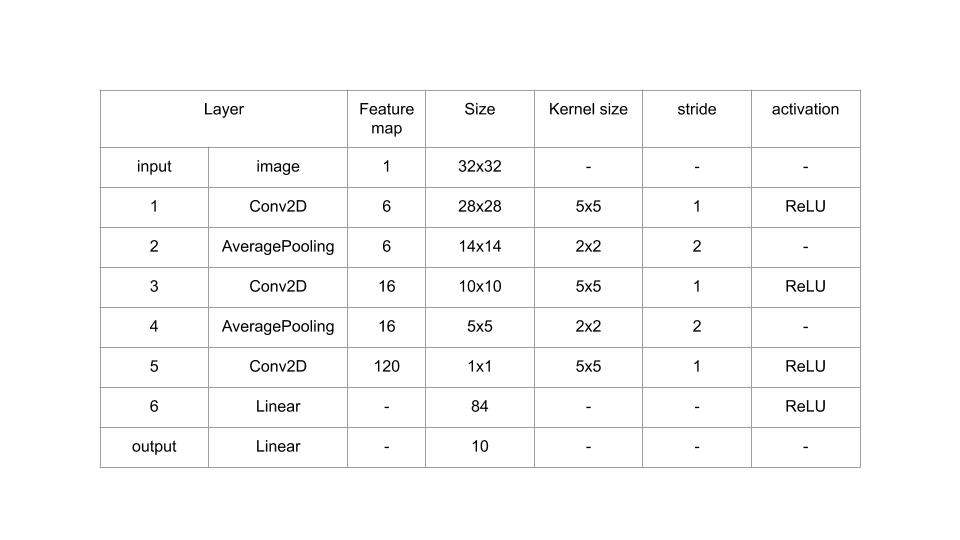

In [ ]:
import torch
import torch.nn.functional as F

class LeNet5(torch.nn.Module):

  def __init__(self, D_out):
    super(LeNet5, self).__init__()
    pass
  
  def forward(self, x):
    """
      :param: x : the image to process ( shape [batch_size, 1, height, width] )
      :return: logits: the unscaled output scores that will be process by the softmax ( shape [batch_size, D_out] )
    """

    # TODO
    pass

### Correction

In [ ]:
import torch
import torch.nn.functional as F

class LeNet5(torch.nn.Module):
  
  def __init__(self, D_out):
    super(LeNet5, self).__init__()

    self.conv1     = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=1, padding=2)
    self.avg_pool1 = torch.nn.AvgPool2d(kernel_size=(2,2), stride=2)
    self.conv2     = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=1)
    self.avg_pool2 = torch.nn.AvgPool2d(kernel_size=(2,2), stride=2)
    self.conv3     = torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=1) 
    self.flatten   = torch.nn.Flatten()

    self.linear1   = torch.nn.Linear(120, 84)
    self.linear2   = torch.nn.Linear( 84, D_out) 

  def forward(self, x):
    """
      :param: x : the image to process ( shape [batch_size, 1, height, width] )
      :return: logits: the unscaled output scores that will be process by the softmax ( shape [batch_size, D_out] )
    """
    
    x = F.relu(self.conv1(x) ) # [batch_size, 6, 28, 28]
      
    x = self.avg_pool1(x) # [batch_size, 6, 14, 14]
    
    x = F.relu( self.conv2(x) ) # [batch_size, 16, 10, 10]
    
    x = self.avg_pool2(x) # # [batch_size, 16, 5, 5]
    
    x = F.relu( self.conv3(x) ) # [batch_size, 120, 1, 1]
    
    x = self.flatten(x) # [batch_size, 120]



    x = F.relu( self.linear1(x) ) # [batch_size, 84]
  
    x = self.linear2(x) # [batch_size, 10]
    
    # [batch_size, 10]
    return x



Now load the dataset and define the procedure. 

We load the MNIST dataset using the torchvision package.

In [ ]:
from torchvision import datasets, transforms

'''
  This code is used to download the dataset which is already splitted
  into a training  set and a testing set.
  Note that we apply simple transformation to the data to convert them
  into PyTorch Tensors and to normalize the pixel values entries in a 
  specific range of values. 
'''

transform_actions = transforms.Compose(
    [
     #transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
    ]
)

mnist_trainset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform = transform_actions
)
    
mnist_testset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform = transform_actions
)


print("Training set size: ", len(mnist_trainset))
print("Testing set size : ", len(mnist_testset))

# we define a loader and an iterator to process the training set
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=32, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training set size:  60000
Testing set size :  10000


We also use the same training procedure we used in the previous practical session.

In [ ]:
def train_optim(model, epochs, log_frequency, device, learning_rate=1e-4):

  model.to(device) # we make sure the model is on the proper device

  # Multiclass classification setting, we use cross-entropy
  # note that this implementation requires the logits as input 
  # logits: values prior softmax transformation 
  loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  
  for t in range(epochs):

      model.train() # we specify that we are training the model

      # At each epoch, the training set will be processed as a set of batches
      for batch_id,  batch in enumerate(trainloader) : 

        images, labels  = batch

        # we put the data on the same device
        images , labels = images.to(device), labels.to(device)  
        
        y_pred = model(images) # forward pass output=logits

        loss = loss_fn(y_pred, labels)

        if batch_id % log_frequency == 0:
            print("epoch: {:03d}, batch: {:03d}, loss: {:.3f} ".format(t+1, batch_id+1, loss.item()))

        optimizer.zero_grad() # clear the gradient before backward
        loss.backward()       # update the gradient

        optimizer.step() # update the model parameters using the gradient

      # Model evaluation after each step computing the accuracy
      model.eval()
      total = 0
      correct = 0
      for batch_id, batch in enumerate(testloader):
        images , labels = batch
        images , labels = images.to(device), labels.to(device)
        y_pred = model(images) # forward computes the logits
        sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
        _, predicted = torch.max(sf_y_pred , 1)     # decision rule, we select the max
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      
      print("[validation] accuracy: {:.3f}%\n".format(100 * correct / total))

Let us now instanciate our LeNet-5 model and train it.

In [ ]:
## Instanciate a model using the defined LeNet5 class
###########################
##   Fill in this part   ##
###########################

D_out = 10

model = LeNet5(D_out)


## Select the device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## train the model.
train_optim(model, epochs=3, log_frequency=60, device=device, learning_rate=1e-3)

epoch: 001, batch: 001, loss: 2.321 
epoch: 001, batch: 061, loss: 1.010 
epoch: 001, batch: 121, loss: 0.610 
epoch: 001, batch: 181, loss: 0.213 
epoch: 001, batch: 241, loss: 0.420 
epoch: 001, batch: 301, loss: 0.157 
epoch: 001, batch: 361, loss: 0.376 
epoch: 001, batch: 421, loss: 0.459 
epoch: 001, batch: 481, loss: 0.123 
epoch: 001, batch: 541, loss: 0.396 
epoch: 001, batch: 601, loss: 0.110 
epoch: 001, batch: 661, loss: 0.165 
epoch: 001, batch: 721, loss: 0.041 
epoch: 001, batch: 781, loss: 0.176 
epoch: 001, batch: 841, loss: 0.100 
epoch: 001, batch: 901, loss: 0.020 
epoch: 001, batch: 961, loss: 0.013 
epoch: 001, batch: 1021, loss: 0.045 
epoch: 001, batch: 1081, loss: 0.282 
epoch: 001, batch: 1141, loss: 0.023 
epoch: 001, batch: 1201, loss: 0.263 
epoch: 001, batch: 1261, loss: 0.279 
epoch: 001, batch: 1321, loss: 0.124 
epoch: 001, batch: 1381, loss: 0.063 
epoch: 001, batch: 1441, loss: 0.144 
epoch: 001, batch: 1501, loss: 0.062 
epoch: 001, batch: 1561, loss


**Question 1**

Compare the performance of LeNet5 and the Multi-Layer Perceptron we defined in the previous session. Does the convolution bring any performance gain ?



**Question 2**

Replace the  average pooling by a max pooling. Does this improve the model accuracy ? 


**Question 3**
The code snippet below allows you to check the number of parameters for the first convolution layer.
```python
sum(p.data.nelement() for p in model.conv1.parameters())
```

Use this code to check the number of parameters of LeNet5 model. Compare this number to the number of parameters of the MLP model 

*(help : you can find he code of the MLP model below)*


In [ ]:
print("Nb params of first conv layer : {}".format(sum(p.data.nelement() for p in model.conv1.parameters())))
print("Nb params of second conv layer : {}".format(sum(p.data.nelement() for p in model.conv2.parameters())))
print("Nb params of third conv layer : {}".format(sum(p.data.nelement() for p in model.conv3.parameters())))
print("Nb params of first linear layer : {}".format(sum(p.data.nelement() for p in model.linear1.parameters())))
print("Nb params of second linear layer : {}".format(sum(p.data.nelement() for p in model.linear2.parameters())))

print("Nb params of LeNet5 : {}".format(sum(p.data.nelement() for p in model.parameters())))


Nb params of first conv layer : 156
Nb params of second conv layer : 2416
Nb params of third conv layer : 48120
Nb params of first linear layer : 10164
Nb params of second linear layer : 850
Nb params of LeNet5 : 61706


In [ ]:
class MyModel(torch.nn.Module):
  def __init__(self, D_in, H, H2, D_out):
    super(MyModel, self).__init__()
    self.flatten = torch.nn.Flatten()
    self.lin1 = torch.nn.Linear(D_in, H)
    self.lin2 = torch.nn.Linear(H, H2)
    self.lin3 = torch.nn.Linear(H2, D_out)

  def forward(self, x):
    """
      x : [batch_size, 1, height, width ]
    """
    x = self.flatten(x) # [batch_size, 1 * width * height]
    x = F.relu( self.lin1(x) ) 
    x = F.relu( self.lin2(x) )
    x = self.lin3(x)

    return x

In [ ]:
m = MyModel(28*28,1000,500,10)
#m = MyModel(28*28,75,35,10) MLP with ~ 60k parameters

print("Nb params of MLP : {}".format(sum(p.data.nelement() for p in m.parameters())))

Nb params of MLP : 1290510


**Question 4**

Try to add more fully connected layers. Does this improve the accuracy ? 

## Working with pretrained models

Generally, when working on deep learning projects, we do not start with a model from scratch. We'd rather use a pre-trained architecture.
A pre-trained architecure is a deep learning model that was trained on a large dataset, thus, it implies that the parameters of the model (the weight matrices) are no longer initialized randomly. This also means that the model captured general information about the data it was trained on and that information can be useful of other tasks (the model has "learned" something that can be valuable to perform other tasks). 

Advantanges of using a pre-trained model : 
- State of the art architecture : instead of starting with a random architecture that may need several adjustements for our task, we start with a model that was proven to be effective on other tasks
- Reduces training time for our task : since we do not train from scratch
- Effective when we do not have enough data to train a deep neural network.


There are two ways of using a pre-trained model : 
- For transfer learning : our model was previously trained on a **source** task . Our goal is to adjust it by training it on our **target** task. 
- As a feature extractor : generally, in this setting, the pre-trained model is **freezed**. Freezing a model means that its weights are no longer updated by the optimizer. To solve our task, we either add some layers (MLP, for example) or we use the features extracted on another model like SVM. 


```torchvision``` contrains several pretrained models for image processing and computer vision tasks. We will see in this practical session how to use them to solve machine learning tasks.
You can see the list of available models in the [official documentation](https://pytorch.org/docs/stable/torchvision/models.html).



You can also list the available models by using the `help` function on the models module in `torchvision`.

In [ ]:
import torch
from torchvision import models

help(models)

Help on package torchvision.models in torchvision:

NAME
    torchvision.models

PACKAGE CONTENTS
    _api
    _meta
    _utils
    alexnet
    convnext
    densenet
    detection (package)
    efficientnet
    feature_extraction
    googlenet
    inception
    mnasnet
    mobilenet
    mobilenetv2
    mobilenetv3
    optical_flow (package)
    quantization (package)
    regnet
    resnet
    segmentation (package)
    shufflenetv2
    squeezenet
    swin_transformer
    vgg
    video (package)
    vision_transformer

FILE
    /usr/local/lib/python3.7/dist-packages/torchvision/models/__init__.py




To use one model, we simply instanciate it. For example, let's instanciate a [ResNet](https://arxiv.org/pdf/1512.03385.pdf) model. If you pay attention to the documentation, you will see that some models (like ResNet) have many implementations. They differ mainly on the depth of the model and size of the convolution layers. Generally, the deeper is the model, the better accuracy you have. Choosing a model will be a tradeoff between available space (deeper models have much more parameters) and accuracy we want. Let's see two examples : restnet-18 and resnet-50. 

**Note** : do not hesistate to instanciate other models to see how they were built or to later test them on different tasks

**Note 2** : pay a close attention to the output layer. Since these models were designed to be trained on [ImageNet](http://image-net.org/about-overview) dataset which has 1000 classes, we must adapt the output layer to the number of output classes of our task.

In [ ]:
resnet18 = models.resnet18()
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
resnet50 = models.resnet50()
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

You can also check the number of parameters to get an idea of how complex can be deeper models. 

In [ ]:
print("Nb params of ResNet18 : {}".format(sum(p.data.nelement() for p in resnet18.parameters())))
print("Nb params of ResNet50 : {}".format(sum(p.data.nelement() for p in resnet50.parameters())))

Nb params of ResNet18 : 11689512
Nb params of ResNet50 : 25557032


One final remark is about the model parameters (weights). As we said earlier, these models are trained on the ImageNet dataset. When we instanciate a model, we can specify wheter we load the weights found by this pretraining, or we use a model with randomly initialized weights (default). For this, each model has a boolean called pretrained. If set to False, the weights are initialized randomly (default value), if set to True, the pretrained weights will be loaded.

**Example :**

In [ ]:
alexnet = models.alexnet(pretrained=True) # load alexnet model with pretrained weights.

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

## Exercice : 

- Instanciate **two** ResNet18 models : one **with** pretrained weights and another **without** pretrained weights.
- Do the adequate modifications in order to train the two models on the MNIST dataset (pay attention to the fact that ImageNet contains colored images and 1000 classes while MNIST has grey-scale images and 10 classes)
- Compare the accuracy of the two models. Does pretraining bring any gain ? 

## Correction

In [ ]:
# load resnet without pretrained weights
resnet18 = models.resnet18(pretrained=False)
resnet18.conv1 = torch.nn.Conv2d(1, 64, (7,7), stride=(2,2), padding=(3,3), bias=False)
resnet18.fc = torch.nn.Linear(512, 10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
print("Training resnet without pretrained weights")

## Select the device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## train the model.
train_optim(resnet18, epochs=5, log_frequency=100, device=device, learning_rate=1e-3)

Training resnet without pretrained weights
epoch: 001, batch: 001, loss: 2.500 
epoch: 001, batch: 101, loss: 0.347 
epoch: 001, batch: 201, loss: 0.030 
epoch: 001, batch: 301, loss: 0.022 
epoch: 001, batch: 401, loss: 0.105 
epoch: 001, batch: 501, loss: 0.020 
epoch: 001, batch: 601, loss: 0.053 
epoch: 001, batch: 701, loss: 0.119 
epoch: 001, batch: 801, loss: 0.053 
epoch: 001, batch: 901, loss: 0.095 
epoch: 001, batch: 1001, loss: 0.104 
epoch: 001, batch: 1101, loss: 0.170 
epoch: 001, batch: 1201, loss: 0.028 
epoch: 001, batch: 1301, loss: 0.079 
epoch: 001, batch: 1401, loss: 0.161 
epoch: 001, batch: 1501, loss: 0.189 
epoch: 001, batch: 1601, loss: 0.043 
epoch: 001, batch: 1701, loss: 0.078 
epoch: 001, batch: 1801, loss: 0.009 
[validation] accuracy: 97.410%

epoch: 002, batch: 001, loss: 0.486 
epoch: 002, batch: 101, loss: 0.026 
epoch: 002, batch: 201, loss: 0.041 


KeyboardInterrupt: ignored

In [ ]:

# load resnet with pretrained weights
presnet18 = models.resnet18(pretrained=True)
presnet18.conv1 = torch.nn.Conv2d(1, 64, (7,7), stride=(2,2), padding=(3,3), bias=False)
presnet18.fc = torch.nn.Linear(512, 10)


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
print("Training resnet with pretrained weights")

## Select the device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## train the model.
train_optim(presnet18, epochs=3, log_frequency=100, device=device, learning_rate=1e-3)

Training resnet with pretrained weights
epoch: 001, batch: 001, loss: 2.437 


KeyboardInterrupt: ignored

In [ ]:
# method 2 
# load resnet with pretrained weights
resnet = models.resnet18(pretrained=True)
resnet.fc = torch.nn.Linear(512, 10)
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 3, (1,1), stride=(1,1), padding=0, bias=False),
    resnet
)


In [ ]:
print("Training resnet with pretrained weights")

## Select the device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## train the model.
train_optim(model, epochs=5, log_frequency=100, device=device, learning_rate=1e-3)

Let's now see how we can use a pretrained model as a feature extractor. Recall that when you use your model as a feature extractor, you **freeze** the model parameters. In practice, it means that the `requires_grad` field is set to `False`. When applying backpropagation, the freezed weights won't be updated. Better than this, the gradient will not be computed at all, [which saves you memory](https://discuss.pytorch.org/t/passing-a-subset-of-the-parameters-to-an-optimizer-equivalent-to-setting-requires-grad-of-subset-only-to-true/42866/2).

To freeze model parameters, we can create a simple function that loops over the model parameters and set the `requires_grad` attribute to `False`

In [ ]:
def freeze_model(model):
  for param in model.parameters():
    param.requires_grad = False

**Question** : visualize the `requires_grad` attribute of the instanciated pretrained ResNet18 before and after applying the `freeze_model` method. Do you see the change ?  

Pay attention at the moment when you call `freeze_model` function. If you use it after you changed some layers (like you did in the previous exercice), those layers won't be updated and no training will occure to you model. To avoid this kind of problems, you can follow these steps when using a model as a feature extractor :
1. Instanciate a model with `pretrained=True`
2. Use the `freeze_model` function to freeze model parameters
3. Do the appropriate changes to adapt the model to your task.

**Question** : how will you do if you inverted between step 2. and step 3.? 

**Answer** : Unfreeze the parameters by looping over the parameters and set `requires_grad` back to True. Example with `presnet18`

In [ ]:
freeze_model(presnet18)

for param in presnet18.conv1.parameters():
  param.requires_grad = True

for param in presnet18.fc.parameters():
  param.requires_grad = True

## Exercise : 
In this exercice, you will work on CIFAR10 dataset. 

You are asked to use ResNet (or any other model!) as a feature extractor. 

Add a multi-layer perceptron of your choice to solve the classification task.


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models

Let's load the CIFAR10 dataset. This dataset contains 60000 images from 10 classes as shown in the picture below. The images are 3 channels 32x32 pixel.

![](https://pytorch.org/tutorials/_images/cifar10.png)

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Number of training instances: {}\nNumber of test instances : {}".format(len(trainset), len(testset)))

## Correction

In [ ]:
resnet = models.resnet50(pretrained=True)

freeze_model(resnet)

resnet.fc = torch.nn.Sequential(
    torch.nn.Linear(2048, 1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024,512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 10)
)


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_optim(resnet, epochs=2, log_frequency=60, device=device)

In [ ]:
import matplotlib.pyplot as plt


resnet.eval()

images, labels = iter(trainloader).next()
images = images.to(device)

logits = resnet(images) # pass forward
distrib_prob = torch.nn.Softmax(dim=1)(logits)
_, predicted = torch.max(distrib_prob , 1)     # decision rule, we select the max

id_image = 1
image = images[id_image]
expected_label = labels[id_image]
prediction = predicted[id_image]

# plot
figure = plt.figure()

plt.axis('off')
plt.gca().set_title(f"expected: {classes[expected_label]} {expected_label} : prediction {classes[prediction]} {prediction}")
image_t = image.permute(1,2,0)
from torch import Tensor
plt.imshow(Tensor.cpu(image_t).numpy().squeeze())


Credits for the animation : 
https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html